In [1]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader("{}.JP".format(code), "stooq").sort_index()
  return df

In [2]:
!pip install mplfinance

     |████████████████████████████████| 70 kB 3.8 MB/s 


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

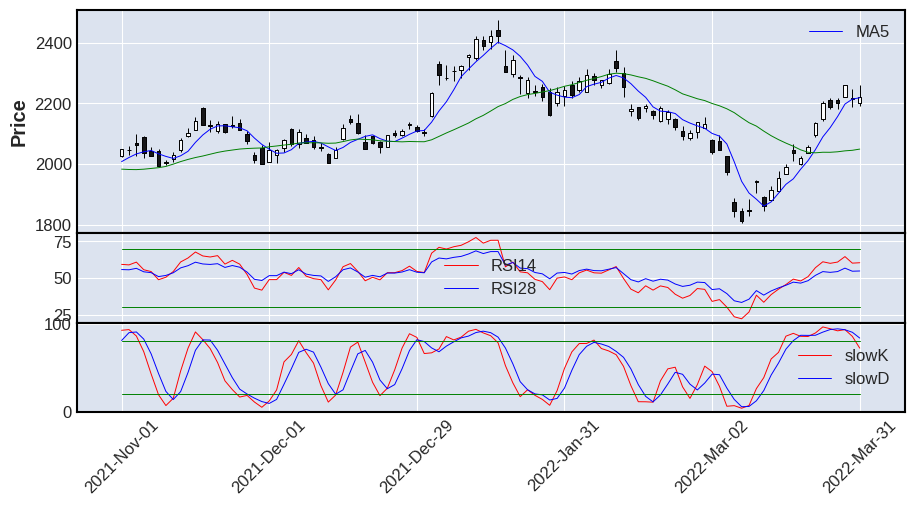

In [5]:
import mplfinance as mpf
import datetime as dt
import talib as ta

df = get_stock_data(7203)  # トヨタ自動車
close = df["Close"]

# 移動平均
df['ma5'], df['ma25'] = ta.SMA(close ,timeperiod=5), ta.SMA(close ,timeperiod=25)

# RSI
rsi14 = ta.RSI(close, timeperiod=14)
rsi28 = ta.RSI(close, timeperiod=28)
df['rsi14'], df['rsi28'] = rsi14, rsi28

df['70'] = [70 for _ in close]
df['30'] = [30 for _ in close]

# ストキャスティクス
slowK, slowD = ta.STOCH(df["High"], df["Low"], close,
                                fastk_period=5, slowk_period=3, 
                                slowk_matype=0, slowd_period=3, 
                                slowd_matype=0)
df['slowK'], df['slowD'] = slowK, slowD

df['80'] = [80 for _ in close]
df['20'] = [20 for _ in close]

rdf = df[dt.datetime(2021,11,1):dt.datetime(2022,3,31)]

apd  = [
          # 5日移動平均線  
          mpf.make_addplot(rdf['ma5'], color='blue', 
                                panel=0, width=0.7), 
          # 25日移動平均線
          mpf.make_addplot(rdf['ma25'], color='green', 
                                panel=0, width=0.7),
          # RSI 14
          mpf.make_addplot(rdf['rsi14'], color='red', 
                                panel=1, width=0.7),
          # RSI 28
          mpf.make_addplot(rdf['rsi28'], color='blue',
                                panel=1, width=0.7), 
          # 補助線
          mpf.make_addplot(rdf['70'], color='green', 
                                panel=1, width=0.7),
          mpf.make_addplot(rdf['30'], color='green',
                                panel=1, width=0.7),
          # Slow％K
          mpf.make_addplot(rdf['slowK'], color='red', 
                              panel=2, width=0.7),
          # Slow％D
          mpf.make_addplot(rdf['slowD'], color='blue', 
                              panel=2, width=0.7), 
          # 補助線
          mpf.make_addplot(rdf['80'], color='green', 
                              panel=2, width=0.7),
          mpf.make_addplot(rdf['20'], color='green', 
                              panel=2, width=0.7)
      ]

fig, axes = mpf.plot(rdf, type="candle", figratio=(2,1), 
                        addplot=apd, returnfig=True)
axes[0].legend(["MA5"])
axes[2].legend(["RSI14", "RSI28"])
axes[4].legend(["slowK", "slowD"])
fig.show()

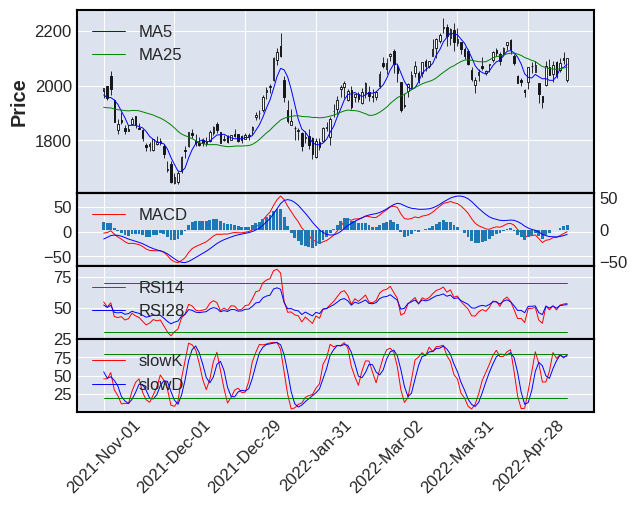

In [7]:
df = get_stock_data(5401) #日本製鉄
close = df["Close"]

# 移動平均線
df['ma5'] = ta.SMA(close ,timeperiod=5)
df['ma25'] = ta.SMA(close ,timeperiod=25)

# MACD、シグナル、ヒストグラム
macd, macdsignal, hist = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df['macd'] = macd
df['macd_signal'] = macdsignal
df['hist'] = hist

# RSI
rsi14 = ta.RSI(close, timeperiod=14)
rsi28 = ta.RSI(close, timeperiod=28)
df['rsi14'], df['rsi28'] = rsi14, rsi28

df['70'] = [70 for _ in close]
df['30'] = [30 for _ in close]

# ストキャスティクス
slowK, slowD = ta.STOCH(df["High"], df["Low"], close,
                                fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
df['slowK'], df['slowD'] = slowK, slowD

df['80'] = [80 for _ in close]
df['20'] = [20 for _ in close]

rdf = df[dt.datetime(2021,11,1):dt.datetime(2022,12,31)]

apd  = [
          # 5日移動平均線  
          mpf.make_addplot(rdf['ma5'], color='blue', 
                                panel=0, width=0.7), 
          # 25日移動平均線
          mpf.make_addplot(rdf['ma25'], color='green', 
                                panel=0, width=0.7),
          # MACD
          mpf.make_addplot(rdf['macd'], color='red', 
                                panel=1, width=0.7),
          # シグナル
          mpf.make_addplot(rdf['macd_signal'], color='blue', 
                                panel=1, width=0.7),
          # ヒストグラム
          mpf.make_addplot(rdf['hist'], panel=1, type='bar'), 
        
          # RSI 14
          mpf.make_addplot(rdf['rsi14'], color='red', 
                                panel=2, width=0.7),
          # RSI 28
          mpf.make_addplot(rdf['rsi28'], color='blue',
                                panel=2, width=0.7), 
          # 補助線
          mpf.make_addplot(rdf['70'], color='green', 
                                panel=2, width=0.7),
          mpf.make_addplot(rdf['30'], color='green',
                                panel=2, width=0.7),
          # Slow％K
          mpf.make_addplot(rdf['slowK'], color='red', 
                              panel=3, width=0.7),
          # Slow％D
          mpf.make_addplot(rdf['slowD'], color='blue', 
                              panel=3, width=0.7), 
          # 補助線
          mpf.make_addplot(rdf['80'], color='green', 
                              panel=3, width=0.7),
          mpf.make_addplot(rdf['20'], color='green', 
                              panel=3, width=0.7)
      ]

fig, axes = mpf.plot(rdf, type="candle", figratio=(5,4), 
                      addplot=apd, returnfig=True)
axes[0].legend(["MA5", "MA25"])
axes[2].legend(["MACD", "SIGNAL"])
axes[4].legend(["RSI14", "RSI28"])
axes[6].legend(["slowK", "slowD"])
fig.show()

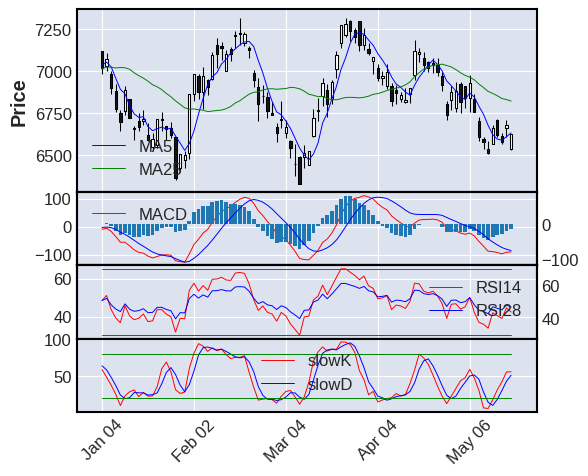

In [8]:
df = get_stock_data(9020)  # 東日本旅客鉄道
close = df["Close"]

# 移動平均線
df['ma5'] = ta.SMA(close ,timeperiod=5)
df['ma25'] = ta.SMA(close ,timeperiod=25)

# ボリンジャーバンド　±1σ　±2σ
df["upper1"], _, df["lower1"] = ta.BBANDS(close, timeperiod=25, nbdevup=1, nbdevdn=1, matype=ta.MA_Type.SMA)
df["upper2"], _, df["lower2"] = ta.BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=ta.MA_Type.SMA)

# MACD、シグナル、ヒストグラム
macd, macdsignal, hist = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df['macd'] = macd
df['macd_signal'] = macdsignal
df['hist'] = hist

# RSI
rsi14 = ta.RSI(close, timeperiod=14)
rsi28 = ta.RSI(close, timeperiod=28)
df['rsi14'], df['rsi28'] = rsi14, rsi28

df['70'] = [70 for _ in close]
df['30'] = [30 for _ in close]

# ストキャスティクス
slowK, slowD = ta.STOCH(df["High"], df["Low"], close,
                              fastk_period=5, slowk_period=3, 
                              slowk_matype=0, slowd_period=3, 
                              slowd_matype=0)
df['slowK'], df['slowD'] = slowK, slowD

df['80'] = [80 for _ in close]
df['20'] = [20 for _ in close]

rdf = df[dt.datetime(2022,1,1):dt.datetime(2022,12,31)]

apd  = [
          # 5日移動平均線  
          mpf.make_addplot(rdf['ma5'], color='blue', 
                                panel=0, width=0.7), 
          # 25日移動平均線
          mpf.make_addplot(rdf['ma25'], color='green', 
                                panel=0, width=0.7),
          # MACD
          mpf.make_addplot(rdf['macd'], color='red', 
                                panel=1, width=0.7),
          # シグナル
          mpf.make_addplot(rdf['macd_signal'], color='blue', 
                                panel=1, width=0.7),
          # ヒストグラム
          mpf.make_addplot(rdf['hist'], panel=1, type='bar'), 
        
          # RSI 14
          mpf.make_addplot(rdf['rsi14'], color='red', 
                                panel=2, width=0.7),
          # RSI 28
          mpf.make_addplot(rdf['rsi28'], color='blue',
                                panel=2, width=0.7), 
          # 補助線
          mpf.make_addplot(rdf['70'], color='green', 
                                panel=2, width=0.7),
          mpf.make_addplot(rdf['30'], color='green',
                                panel=2, width=0.7),
          # Slow％K
          mpf.make_addplot(rdf['slowK'], color='red', 
                              panel=3, width=0.7),
          # Slow％D
          mpf.make_addplot(rdf['slowD'], color='blue', 
                              panel=3, width=0.7), 
          # 補助線
          mpf.make_addplot(rdf['80'], color='green', 
                              panel=3, width=0.7),
          mpf.make_addplot(rdf['20'], color='green', 
                              panel=3, width=0.7)
      ]

fig, axes = mpf.plot(rdf, type="candle", figratio=(5, 4.5), 
                     addplot=apd, returnfig=True)
axes[0].legend(["MA5", "MA25"])
axes[2].legend(["MACD", "SIGNAL"])
axes[4].legend(["RSI14", "RSI28"])
axes[6].legend(["slowK", "slowD"])
fig.show()

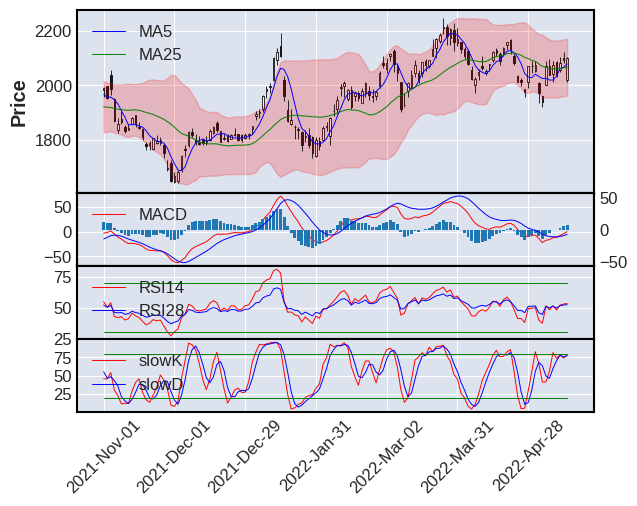

In [10]:
df = get_stock_data(5401) #日本製鉄
close = df["Close"]

# 移動平均線
df['ma5'] = ta.SMA(close ,timeperiod=5)
df['ma25'] = ta.SMA(close ,timeperiod=25)

# MACD、シグナル、ヒストグラム
macd, macdsignal, hist = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df['macd'] = macd
df['macd_signal'] = macdsignal
df['hist'] = hist

# RSI
rsi14 = ta.RSI(close, timeperiod=14)
rsi28 = ta.RSI(close, timeperiod=28)
df['rsi14'], df['rsi28'] = rsi14, rsi28

df['70'] = [70 for _ in close]
df['30'] = [30 for _ in close]

# ストキャスティクス
slowK, slowD = ta.STOCH(df["High"], df["Low"], df["Close"],
                            fastk_period=5, slowk_period=3, 
                            slowk_matype=0, slowd_period=3, 
                            slowd_matype=0)
df['slowK'], df['slowD'] = slowK, slowD

df['80'] = [80 for _ in close]
df['20'] = [20 for _ in close]

# ボリンジャーバンド　±2σ
df["upper2"], _, df["lower2"] = ta.BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=ta.MA_Type.SMA)

rdf = df[dt.datetime(2021,11,1):dt.datetime(2022,12,31)]

apd  = [
          # 5日移動平均線  
          mpf.make_addplot(rdf['ma5'], color='blue', 
                                panel=0, width=0.7), 
          # 25日移動平均線
          mpf.make_addplot(rdf['ma25'], color='green', 
                                panel=0, width=0.7),
          # MACD
          mpf.make_addplot(rdf['macd'], color='red', 
                                panel=1, width=0.7),
          # シグナル
          mpf.make_addplot(rdf['macd_signal'], color='blue', 
                                panel=1, width=0.7),
          # ヒストグラム
          mpf.make_addplot(rdf['hist'], panel=1, type='bar'), 
        
          # RSI 14
          mpf.make_addplot(rdf['rsi14'], color='red', 
                                panel=2, width=0.7),
          # RSI 28
          mpf.make_addplot(rdf['rsi28'], color='blue',
                                panel=2, width=0.7), 
          # 補助線
          mpf.make_addplot(rdf['70'], color='green', 
                                panel=2, width=0.7),
          mpf.make_addplot(rdf['30'], color='green',
                                panel=2, width=0.7),
          # Slow％K
          mpf.make_addplot(rdf['slowK'], color='red', 
                              panel=3, width=0.7),
          # Slow％D
          mpf.make_addplot(rdf['slowD'], color='blue', 
                              panel=3, width=0.7), 
          # 補助線
          mpf.make_addplot(rdf['80'], color='green', 
                              panel=3, width=0.7),
          mpf.make_addplot(rdf['20'], color='green', 
                              panel=3, width=0.7)
      ]

fig, axes = mpf.plot(rdf, type="candle", figratio=(5,4), 
                     addplot=apd, returnfig=True,
                     fill_between={ "y1": rdf["lower2"].values, 
                                    "y2": rdf["upper2"].values, 
                                    "color": 'red', "alpha": 0.2 })
axes[0].legend(["MA5", "MA25"])
axes[2].legend(["MACD", "SIGNAL"])
axes[4].legend(["RSI14", "RSI28"])
axes[6].legend(["slowK", "slowD"])
fig.show()

In [12]:
import os
from google.colab import drive
drive.mount("/content/drive")
os.chdir("/content/drive/MyDrive/")

Mounted at /content/drive


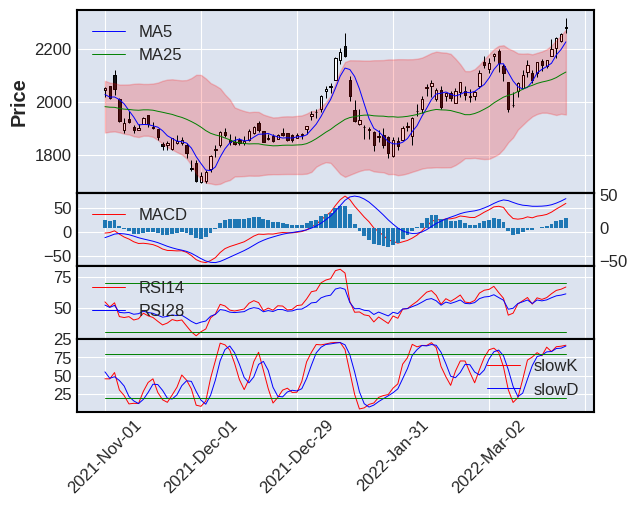

In [ ]:
fig, axes = mpf.plot(rdf, type="candle", figratio=(5,4), addplot=apd, returnfig=True,
                     fill_between=dict(y1=rdf["lower2"].values, y2=rdf["upper2"].values, color='red', alpha=0.2))
axes[0].legend(["MA5", "MA25"])
axes[2].legend(["MACD", "SIGNAL"])
axes[4].legend(["RSI14", "RSI28"])
axes[6].legend(["slowK", "slowD"])
fig.show()
fig.savefig('test.png')